In [1]:
import numpy
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="darkgrid")
from scipy.signal import savgol_filter


In [12]:
def get_title(filename):
    """
     >>> get_title("logs/0613/0613-q1-0000.train")
     '0613-q1-0000'
     """
    return os.path.splitext(os.path.basename(filename))[0]

def get_df_from_file(f):
    df = pd.read_csv(f)
    df = df.reset_index()
    return df

def do_plot(df, title, do_comb=False, do_drmsd=False, do_rmse=False, do_lndrmsd=False,
            do_smooth=False, skip_first=None, plot_val=False, y_max=None):
    dftrain = df[df["is_val"] != True]
    dftrain = dftrain.iloc[skip_first:]
    smooth_size = min(len(dftrain["drmsd"])//7, 301)
    if smooth_size % 2 == 0: smooth_size += 1
    if do_drmsd:
        sns.lineplot(x=dftrain.index, y="drmsd", data=dftrain, label="drmsd")
        
        if do_smooth:
            yhat = savgol_filter(dftrain["drmsd"], smooth_size, 2)
            sns.lineplot(x=dftrain.index, y=yhat, color="lightblue")
        if plot_val:
            dfval = df[df["is_val"] & df["is_end_of_epoch"]]
            sns.lineplot(x=dfval.index, y="drmsd", data=dfval, label="drmsd-val")
    if do_rmse:
        sns.lineplot(x=dftrain.index, y="rmse", data=dftrain, label="rmse")
        if do_smooth:
            yhat = savgol_filter(dftrain["rmse"], smooth_size, 2)
            sns.lineplot(x=dftrain.index, y=yhat, color="lightblue")
        if plot_val:
            dfval = df[df["is_val"] & df["is_end_of_epoch"]]
            sns.lineplot(x=dfval.index, y="rmse", data=dfval, label="rmse-val")
    if do_comb:
        sns.lineplot(x=dftrain.index, y="combined", data=dftrain, label="combined")
        if do_smooth:
            yhat = savgol_filter(dftrain["combined"], smooth_size, 2)
            sns.lineplot(x=dftrain.index, y=yhat, color="lightblue")
        if plot_val:
            dfval = df[df["is_val"] & df["is_end_of_epoch"]]
            sns.lineplot(x=dfval.index, y="combined", data=dfval, label="combined-val")
    if do_lndrmsd:
        sns.lineplot(x=dftrain.index, y="ln_drmsd", data=dftrain, label="ln_drmsd")
        if do_smooth:
            yhat = savgol_filter(dftrain["ln_drmsd"], smooth_size, 2)
            sns.lineplot(x=dftrain.index, y=yhat, color="lightblue")
        if plot_val:
            dfval = df[df["is_val"] & df["is_end_of_epoch"]]
            sns.lineplot(x=dfval.index, y="ln_drmsd", data=dfval, label="ln_drmsd-val")
    plt.ylabel("Loss Value")
    plt.xlabel("Iteration Number")
    plt.legend(loc=(1.04,.7))
    plt.title("Transformer Training Loss".format(title))
    if y_max:
        plt.ylim((None, y_max))
    plt.figure()

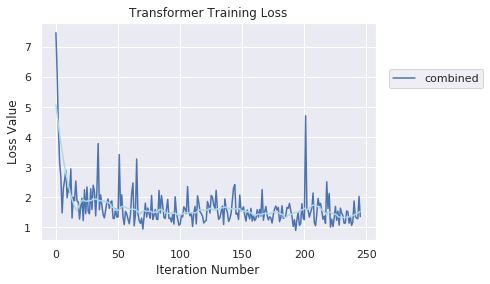

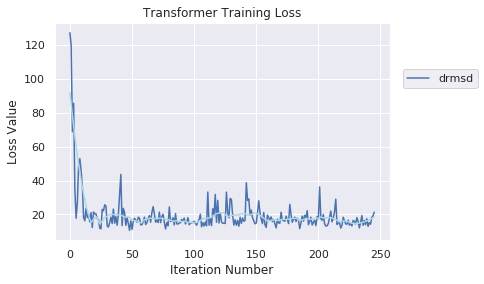

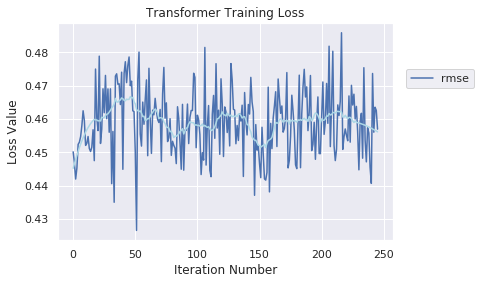

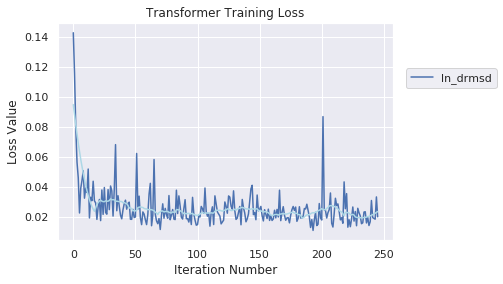

<Figure size 432x288 with 0 Axes>

In [8]:
a = get_df_from_file("../../data/logs/fixed_tf.train")
do_plot(a, "Trial", do_comb=True, do_smooth=True)
do_plot(a, "Trial", do_drmsd=True, do_smooth=True)
do_plot(a, "Trial", do_rmse=True, do_smooth=True)
do_plot(a, "Trial", do_lndrmsd=True, do_smooth=True)
# do_plot(a, "Trial", do_comb=True)
# do_plot(a, "Trial", do_drmsd=True)
# do_plot(a, "Trial", do_rmse=True)
# do_plot(a, "Trial", do_lndrmsd=True)

In [59]:
a = a[a["is_val"] != True]
a["rmse-weighted"] = .5 * a["rmse"] / .3
a["lndrmsd-weighted"] = .5 * (a["ln_drmsd"]) / .01

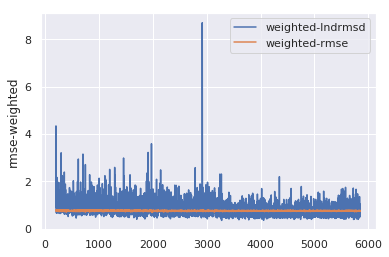

In [60]:
start=200
sns.lineplot(x=a.index[start:], y=a["lndrmsd-weighted"][start:], label="weighted-lndrmsd")
sns.lineplot(x=a.index[start:], y=a["rmse-weighted"][start:], label="weighted-rmse", alpha=1)
plt.legend()

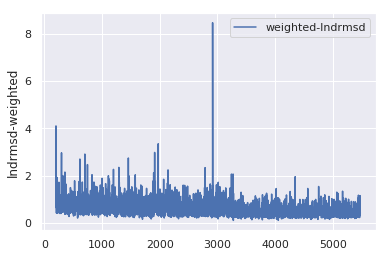

In [57]:
sns.lineplot(x=a.index[start:], y=a["lndrmsd-weighted"][start:], label="weighted-lndrmsd")



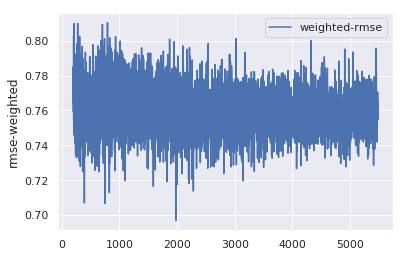

In [39]:
sns.lineplot(x=a.index[start:], y=a["rmse-weighted"][start:], label="weighted-rmse", alpha=1)



/home/jok120/build/anaconda3/envs/pytorch_src2/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


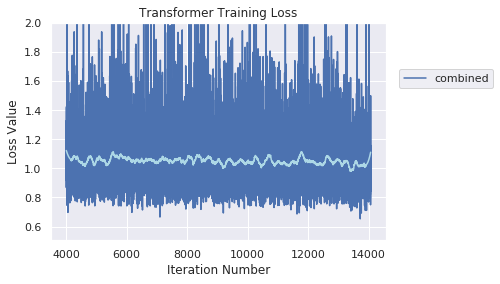

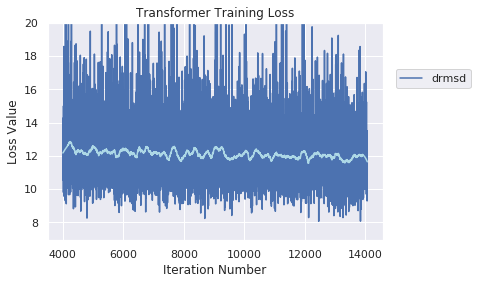

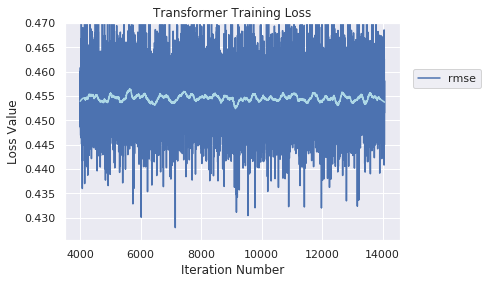

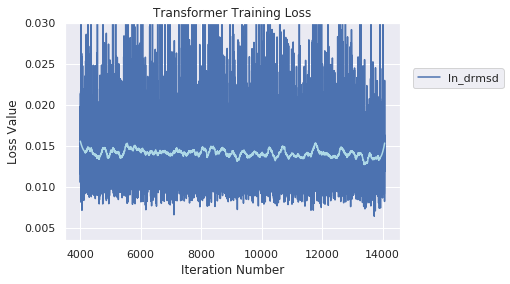

<Figure size 432x288 with 0 Axes>

In [65]:
a = get_df_from_file("../../data/logs/fixed_tf.train")
a["combined"][a["combined"] == 111] = 4
skipto = 4000
do_plot(a, "Trial", do_comb=True, do_smooth=True, skip_first=skipto, y_max=2)
do_plot(a, "Trial", do_drmsd=True, do_smooth=True, skip_first=skipto,  y_max=20)
do_plot(a, "Trial", do_rmse=True, do_smooth=True, skip_first=skipto, y_max=0.47)
do_plot(a, "Trial", do_lndrmsd=True, do_smooth=True, skip_first=skipto,  y_max=0.03)

In [189]:
plt.rcParams['figure.figsize'] = [6.5, 4.5]
plt.rcParams['figure.dpi'] = 200


In [ ]:
a = get_df_from_file("../../data/logs/casp12_30_ln_12.train")
a["ln_drmsd"] = a["ln_drmsd"] * 1000
a["combined"] = a["combined"]
a["combined"][a["combined"] == 111] = 4
do_plot(a, "Trial", do_comb=True, do_smooth=True, skip_first=1, plot_val=True)
do_plot(a, "Trial", do_drmsd=True, do_smooth=True, skip_first=50, plot_val=True)
do_plot(a, "Trial", do_lndrmsd=True, do_smooth=True, skip_first=50, plot_val=True)
do_plot(a, "Trial", do_rmse=True, do_smooth=True, skip_first=None, plot_val=True)
do_plot(a, "Trial", do_lndrmsd=True, do_drmsd=True, skip_first=50, plot_val=True)